In [3]:
pip install -U textblob

You should consider upgrading via the 'C:\Users\kartik\anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:

import pandas as pd

In [7]:
data = pd.read_csv('Elon_musk.csv',encoding='cp1252')
data.head()

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [8]:

df =data.drop('Unnamed: 0',axis=1)

In [9]:

df.head()
     

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [10]:
#  cleaning the text by removing irrelevant information (at least for our purposes) like hashtags, mentions, retweets

In [11]:
import re

# Clean The Data
def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) # Remove Mentions
    text = re.sub(r"\[A-Za-z0-9]+", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+", "", text) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    text = re.sub(r";","",text) ## Remove &amp
    text = re.sub(r":","",text) ## Remove &amp
    text = re.sub(r"","",text) ## Remove &amp
    

    
    return text

In [12]:
# Clean The Text
df["Text"] = df["Text"].apply(cleantext)


In [13]:
df.head()

,Text
0,I’m an alien
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...
2,Great interview!
3,Doge is underestimated
4,Congratulations Tesla China for amazing execu...


In [14]:
#Word frequency
freq = pd.Series(' '.join(df['Text']).split()).value_counts()[:20] # for top 20
freq
     

the      403
to       390
is       347
a        324
of       301
&amp     216
in       203
for      177
be       154
will     136
on       124
I        114
but      109
that     104
with      99
are       95
it        89
at        85
Tesla     85
The       79
dtype: int64

In [ ]:
df['Text']

In [17]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(df['Text']).split()).value_counts()[:20] # for top 20
freq_Sw

the      403
to       390
is       347
a        324
of       301
&amp     216
in       203
for      177
be       154
will     136
on       124
I        114
but      109
that     104
with      99
are       95
it        89
at        85
Tesla     85
The       79
dtype: int64

In [18]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

In [19]:
# Adding Subjectivity & Polarity
df[["subjectivity", "polarity"]] = df.apply(sentiment_analysis, axis=1)

df
    

,Text,subjectivity,polarity
0,I’m an alien,0.750000,-0.250000
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000
2,Great interview!,0.750000,1.000000
3,Doge is underestimated,0.000000,0.000000
4,Congratulations Tesla China for amazing execu...,0.366667,0.345313
...,...,...,...
1994,"True, it sounds so surreal, but the negative ...",0.508333,0.111111
1995,Make sure to read ur terms &amp conditions be...,0.888889,0.625000
1996,Samwise Gamgee,0.000000,0.000000
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000


In [20]:
# Creating a word cloud

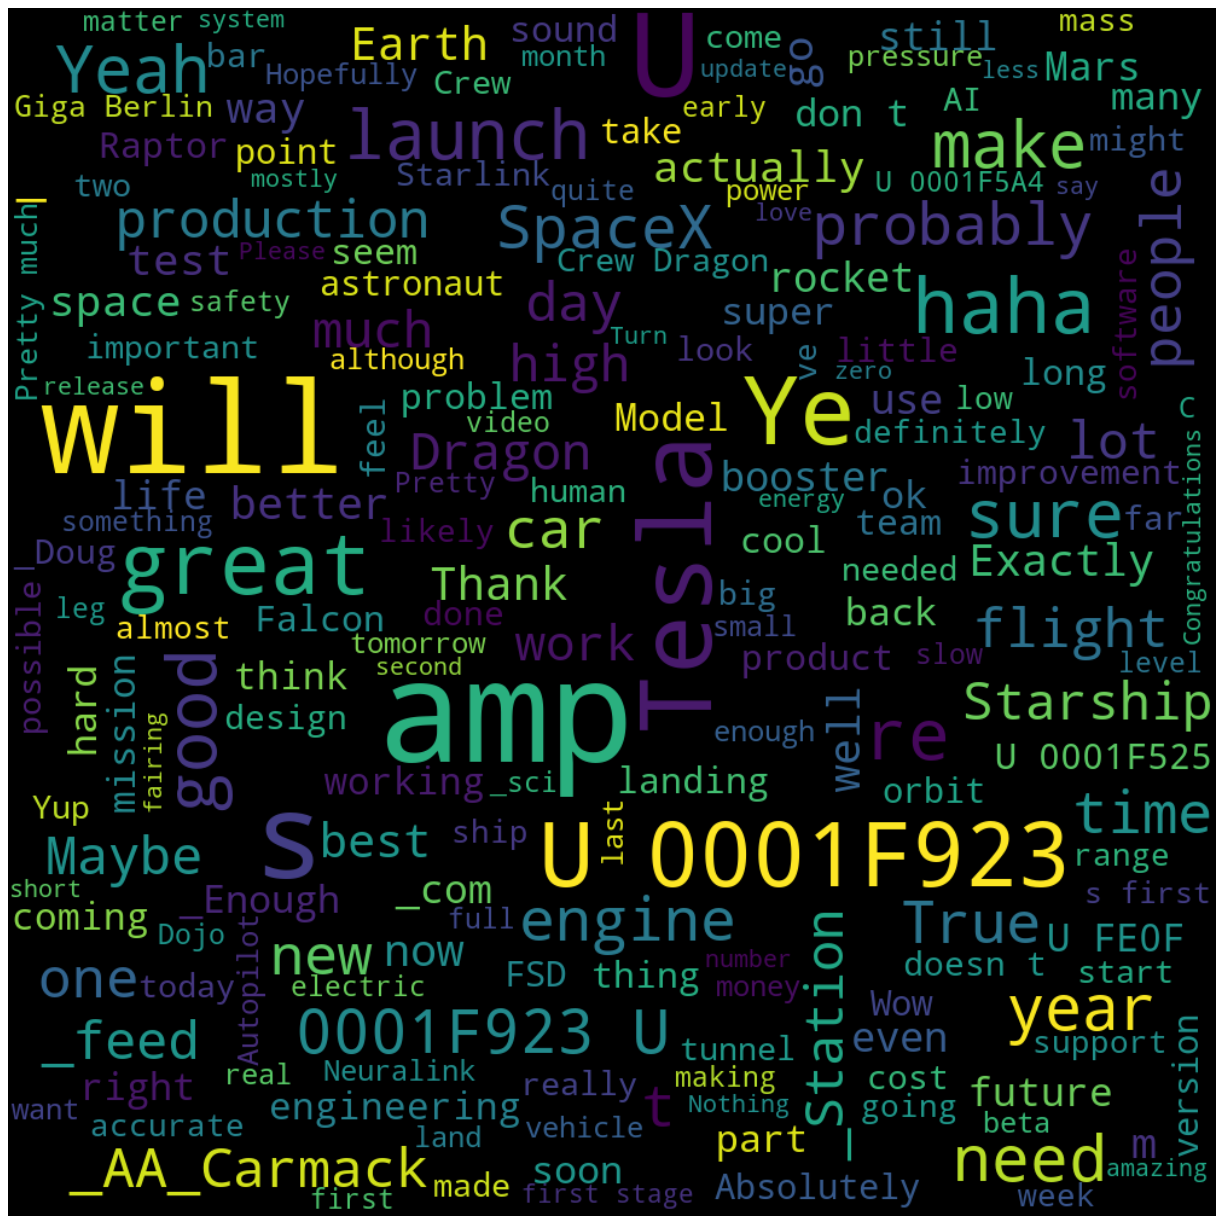

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allwords = " ".join([twts for twts in df['Text']])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()
     

In [22]:
# Compute The Negative, Neutral, Positive Analysis
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [23]:
# Create a New Analysis Column
df["analysis"] = df["polarity"].apply(analysis)
# Print The Data
df

,Text,subjectivity,polarity,analysis
0,I’m an alien,0.750000,-0.250000,Negative
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000,Neutral
2,Great interview!,0.750000,1.000000,Positive
3,Doge is underestimated,0.000000,0.000000,Neutral
4,Congratulations Tesla China for amazing execu...,0.366667,0.345313,Positive
...,...,...,...,...
1994,"True, it sounds so surreal, but the negative ...",0.508333,0.111111,Positive
1995,Make sure to read ur terms &amp conditions be...,0.888889,0.625000,Positive
1996,Samwise Gamgee,0.000000,0.000000,Neutral
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000,Negative


In [24]:
# Displaying the positive and negative tweets

In [25]:
positive_tweets = df[df['analysis'] == 'Positive']
negative_tweets = df[df['analysis'] == 'Negative']

print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
  print(' -' + row['Text'])

print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
  print(' -' + row['Text'])

positive tweets
 -  Great interview!
 - Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
 -Happy New Year of the Ox! 
 -_   Haha thanks )
 -The most entertaining outcome is the most likely
negative tweets
 - I’m an alien
 - Your app sucks
 - _ Starlink is a staggeringly difficult technical &amp economic endeavor. However, if we don… 
 - _ SpaceX needs to pass through a deep chasm of negative cash flow over the next year or… 
 - Everyone at Tesla receives stock. 

My comp is all stock/options, which I do not take off the table. 

That’s what you’re missing.


# Is Elon generally positive or negative?

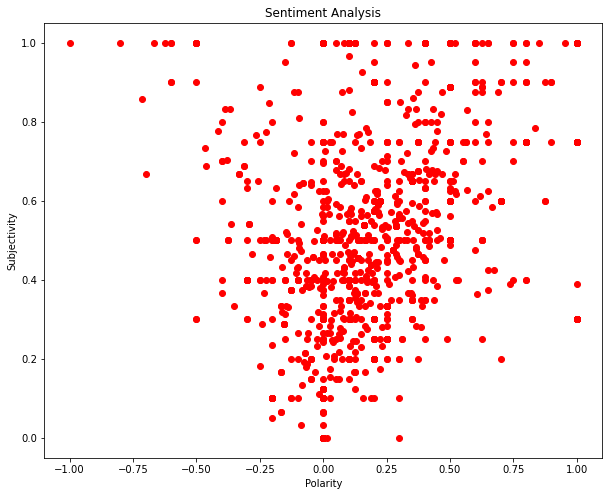

In [26]:

plt.figure(figsize=(10, 8))

for i in range(0, df.shape[0]):
    plt.scatter(df["polarity"][i], df["subjectivity"][i], color = "Red")

plt.title("Sentiment Analysis") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing The Graph

In [27]:
len(positive_tweets) / len(negative_tweets)


4.0691244239631335

In [ ]:
#Elon mostly do positive tweets compared to negative